In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools

In [3]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.shape

(245725, 11)

In [6]:
test.shape

(105312, 10)

In [7]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
is_lead = train['Is_Lead'].value_counts()

In [10]:
is_lead_1 = is_lead[1]/train['Is_Lead'].count()*100
is_lead_0 = is_lead[0]/train['Is_Lead'].count()*100

In [11]:
is_lead_1, is_lead_0

(23.720826126767726, 76.27917387323228)

In [12]:
is_lead[1], is_lead[0]

(58288, 187437)

In [13]:
is_lead

0    187437
1     58288
Name: Is_Lead, dtype: int64

Text(0, 0.5, 'Frequency')

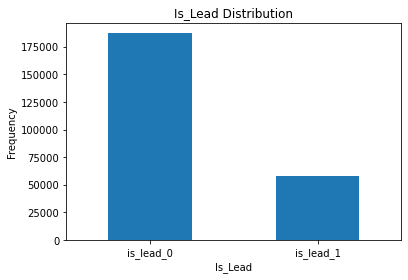

In [14]:
LABELS = ["is_lead_0", "is_lead_1"]
count_classes = pd.value_counts(train['Is_Lead'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Is_Lead Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Is_Lead")

plt.ylabel("Frequency")

In [15]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [16]:
train['Age'].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

In [17]:
train_85 = train[train['Age'] == 85]

In [18]:
train_85

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
411,B3SZXEA3,Male,85,RG282,Other,X3,115,Yes,891513,No,0
459,NGO2QWP5,Male,85,RG284,Other,X3,122,NaN,1075662,Yes,1
840,SHQ6SJSA,Male,85,RG262,Other,X2,91,No,946372,Yes,0
1454,SNSMEQZU,Male,85,RG283,Other,X3,43,No,427618,Yes,0
1488,EJEZPOCZ,Female,85,RG254,Other,X3,86,Yes,1395973,No,0
...,...,...,...,...,...,...,...,...,...,...,...
244192,YTQNRO3B,Female,85,RG265,Other,X3,51,No,870206,No,0
244624,7JVWB7QX,Male,85,RG268,Other,X3,128,Yes,775617,No,0
244986,6XWIISCH,Male,85,RG284,Other,X3,115,Yes,1879795,Yes,0
245106,HJEHNTAP,Male,85,RG254,Other,X3,86,NaN,1442983,No,1


In [19]:
pd.crosstab(train['Gender'], train['Is_Lead'])

Is_Lead,0,1
Gender,,
Female,88823,22705
Male,98614,35583


In [20]:
pd.crosstab(train['Age'], train['Is_Lead'])

Is_Lead,0,1
Age,,
23,1,0
24,1794,111
25,4940,367
26,8448,591
27,12183,822
...,...,...
81,559,271
82,494,255
83,466,228


In [21]:
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [22]:
pd.crosstab(train['Occupation'], train['Is_Lead'])

Is_Lead,0,1
Occupation,,
Entrepreneur,905,1762
Other,52984,17189
Salaried,60503,11496
Self_Employed,73045,27841


In [23]:
train['Vintage'].describe()

count    245725.000000
mean         46.959141
std          32.353136
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

In [24]:
def rare_encoding(data, variable, tolerance,new_col):
    frequent_cat = find_non_rare_labels(data, variable, tolerance)

    # re-group rare labels
    data[new_col] = np.where(data[variable].isin(
        frequent_cat), data[variable], 'Rare')
    

def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [25]:
for variable in ['Region_Code']:
    
     rare_encoding(train, variable, 0.02,'Region_Code_Group')

In [26]:
train['Region_Code_Group'].value_counts()

Rare     51887
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
Name: Region_Code_Group, dtype: int64

In [27]:
pd.crosstab(train['Is_Active'], train['Is_Lead'])

Is_Lead,0,1
Is_Active,,
No,119007,31283
Yes,68430,27005


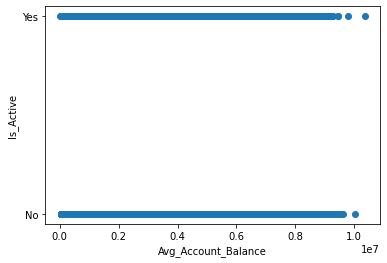

In [28]:
plt.scatter(train['Avg_Account_Balance'], train['Is_Active'])
plt.xlabel('Avg_Account_Balance')
plt.ylabel('Is_Active')
plt.show()

In [29]:
train['Avg_Account_Balance'].describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

In [30]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Group
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,RG268
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,RG277
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,RG268
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,RG270
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,RG282


In [31]:
del train['ID']
del train['Region_Code']
del train['Region_Code_Group']

In [32]:
del test['ID']
del test['Region_Code']


In [33]:
train.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,Salaried,X1,19,No,470454,No,0
4,Female,30,Salaried,X1,33,No,886787,No,0


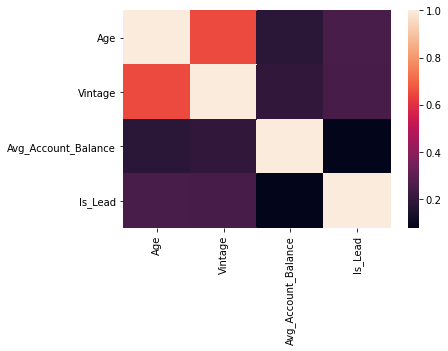

In [34]:
heatmap = sns.heatmap(train.corr(method='spearman'))

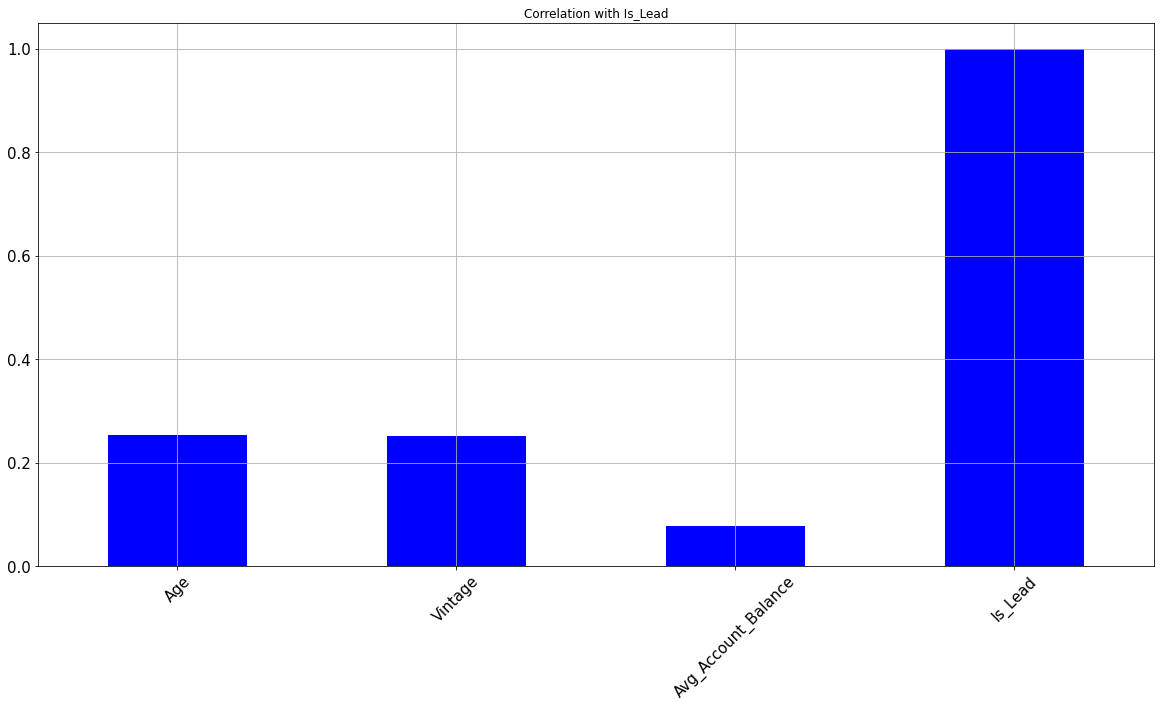

In [35]:
train.corrwith(train.Is_Lead, method='spearman').plot.bar(
        figsize = (20, 10), title = "Correlation with Is_Lead", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()

In [36]:
train.columns, test.columns

(Index(['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
        'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
       dtype='object'),
 Index(['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
        'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
       dtype='object'))

In [37]:
train = pd.get_dummies(train, columns=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'], drop_first = True)
test = pd.get_dummies(test, columns=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'], drop_first = True)


In [38]:
train.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,0,0,1,0,0,0,1,0,0,0
1,30,32,581988,0,0,0,1,0,0,0,0,0,0
2,56,26,1484315,0,0,0,0,1,0,1,0,0,1
3,34,19,470454,0,1,0,1,0,0,0,0,0,0
4,30,33,886787,0,0,0,1,0,0,0,0,0,0


In [39]:
train.shape, test.shape

((245725, 13), (105312, 12))

In [40]:
y = train['Is_Lead']
X = train.drop(columns=['Is_Lead'])

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [45]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,auc
from lightgbm import LGBMClassifier

In [48]:
from sklearn.model_selection import KFold

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LGBMClassifier(verbose=100,boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.1,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgb = model.predict(X_test)
    print("Accuracy: ", roc_auc_score(y_test,y_pred_lgb, average='weighted'))

    errlgb.append(roc_auc_score(y_test,y_pred_lgb, average='weighted'))
    p = model.predict(test)
    y_pred_totlgb.append(p)

Accuracy:  0.7123302558631035
Accuracy:  0.7159382205840712
Accuracy:  0.7160335603802698
Accuracy:  0.7225235063533896
Accuracy:  0.7227434049107695
Accuracy:  0.7182078875533727
Accuracy:  0.7196269196850702
Accuracy:  0.7163069918699188
Accuracy:  0.7160952039897509
Accuracy:  0.719540944456295
